In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
pd.options.mode.chained_assignment = None  # default='warn' ---- ignores false warning for database writing

In [4]:
# write csv into datafile
df = pd.read_csv('medical_raw_data.csv')
print(df.head())

   Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0           1          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1           2          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2           3          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3           4          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4           5          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                                UID          City State        County    Zip  \
0  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621   
1  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446   
2  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110   
3  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072   
4  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181   

        Lat  ...  TotalCharge  Additional_charges 

In [5]:
# checks for duplicates
data = df.loc[df.duplicated()]
print(data)

Empty DataFrame
Columns: [Unnamed: 0, CaseOrder, Customer_id, Interaction, UID, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, ReAdmis, VitD_levels, Doc_visits, Full_meals_eaten, VitD_supp, Soft_drink, Initial_admin, HighBlood, Stroke, Complication_risk, Overweight, Arthritis, Diabetes, Hyperlipidemia, BackPain, Anxiety, Allergic_rhinitis, Reflux_esophagitis, Asthma, Services, Initial_days, TotalCharge, Additional_charges, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8]
Index: []

[0 rows x 53 columns]


In [6]:
newdf = df[['ReAdmis', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma'
]].copy()

print(newdf.head())

  ReAdmis HighBlood Stroke  Overweight Arthritis Diabetes Hyperlipidemia  \
0      No       Yes     No         0.0       Yes      Yes             No   
1      No       Yes     No         1.0        No       No             No   
2      No       Yes     No         1.0        No      Yes             No   
3      No        No    Yes         0.0       Yes       No             No   
4      No        No     No         0.0        No       No            Yes   

  BackPain  Anxiety Allergic_rhinitis Reflux_esophagitis Asthma  
0      Yes      1.0               Yes                 No    Yes  
1       No      NaN                No                Yes     No  
2       No      NaN                No                 No     No  
3       No      NaN                No                Yes    Yes  
4       No      0.0               Yes                 No     No  


In [7]:
# checks the number of null values.
print(newdf.isnull().sum())

ReAdmis                 0
HighBlood               0
Stroke                  0
Overweight            982
Arthritis               0
Diabetes                0
Hyperlipidemia          0
BackPain                0
Anxiety               984
Allergic_rhinitis       0
Reflux_esophagitis      0
Asthma                  0
dtype: int64


In [8]:
newdfNoNull = newdf.dropna() #create datafile with no null values
newdfNoNull.isnull().sum()

ReAdmis               0
HighBlood             0
Stroke                0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
dtype: int64

In [9]:
newdfNoNull.shape

(8126, 12)

In [10]:
# create a database with all values being 1 or 0 instead of Yes/No
di = {'Yes': 1, 'No': 0}
noNullwith1_0 = newdfNoNull.replace({'ReAdmis': di,'HighBlood': di,'Stroke': di,'Overweight': di,'Arthritis': di,'Diabetes': di,'Hyperlipidemia': di,'BackPain': di,'Anxiety': di,'Allergic_rhinitis': di,'Reflux_esophagitis': di,'Asthma': di})
noNullwith1_0.head()

,ReAdmis,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma
0,0,1,0,0.0,1,1,0,1,1.0,1,0,1
4,0,0,0,0.0,0,0,1,0,0.0,1,0,0
5,0,0,0,1.0,1,1,0,1,0.0,1,0,0
6,0,1,0,1.0,1,1,1,1,1.0,0,1,0
7,0,0,0,1.0,0,0,0,0,0.0,0,0,0


In [11]:
noNullwith1_0.dtypes

ReAdmis                 int64
HighBlood               int64
Stroke                  int64
Overweight            float64
Arthritis               int64
Diabetes                int64
Hyperlipidemia          int64
BackPain                int64
Anxiety               float64
Allergic_rhinitis       int64
Reflux_esophagitis      int64
Asthma                  int64
dtype: object

In [13]:
# create 2 databases. 1 is patients that have been readmitted, 0 are first time admitted patients
readmissionDF_0 = noNullwith1_0.groupby(noNullwith1_0['ReAdmis']).get_group(0)
readmissionDF_0.head()

,ReAdmis,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma
0,0,1,0,0.0,1,1,0,1,1.0,1,0,1
4,0,0,0,0.0,0,0,1,0,0.0,1,0,0
5,0,0,0,1.0,1,1,0,1,0.0,1,0,0
6,0,1,0,1.0,1,1,1,1,1.0,0,1,0
7,0,0,0,1.0,0,0,0,0,0.0,0,0,0


In [14]:
readmissionDF_1 = noNullwith1_0.groupby(noNullwith1_0['ReAdmis']).get_group(1)
readmissionDF_1.head()

,ReAdmis,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma
5000,1,1,0,0.0,0,0,1,0,0.0,0,0,0
5005,1,0,0,1.0,0,0,1,0,0.0,0,1,0
5008,1,1,0,0.0,1,0,0,0,0.0,1,1,0
5009,1,0,0,0.0,0,0,0,0,1.0,0,0,0
5010,1,0,0,1.0,1,0,0,0,1.0,0,0,0


In [15]:
# readmissionDF_1 is database of patients readmitted
# readmissionDF_0 is database of patients for the first time
readmissionDF_0 = readmissionDF_0.drop(['ReAdmis'], axis=1)
readmissionDF_0['sum'] = readmissionDF_0.sum(axis=1)
readmissionDF_1 = readmissionDF_1.drop(['ReAdmis'], axis=1)
readmissionDF_1['sum'] = readmissionDF_1.sum(axis=1)

median0 = readmissionDF_0['sum'].median()
mean0 = readmissionDF_0['sum'].mean()
mode0 = readmissionDF_0['sum'].mode().iloc[0]

median1 = readmissionDF_1['sum'].median()
mean1 = readmissionDF_1['sum'].mean()
mode1 = readmissionDF_1['sum'].mode().iloc[0]

In [16]:
print(readmissionDF_0.head())
print('median0: ', median0)
print('mean0: ', mean0)
print('mode0: ', mode0)

print(readmissionDF_1.head())
print('median1: ', median1)
print('mean1: ', mean1)
print('mode1: ', mode1)

   HighBlood  Stroke  Overweight  Arthritis  Diabetes  Hyperlipidemia  \
0          1       0         0.0          1         1               0   
4          0       0         0.0          0         0               1   
5          0       0         1.0          1         1               0   
6          1       0         1.0          1         1               1   
7          0       0         1.0          0         0               0   

   BackPain  Anxiety  Allergic_rhinitis  Reflux_esophagitis  Asthma  sum  
0         1      1.0                  1                   0       1  7.0  
4         0      0.0                  1                   0       0  2.0  
5         1      0.0                  1                   0       0  5.0  
6         1      1.0                  0                   1       0  8.0  
7         0      0.0                  0                   0       0  1.0  
median0:  4.0
mean0:  4.116048903551329
mode0:  4.0
      HighBlood  Stroke  Overweight  Arthritis  Diabetes  H

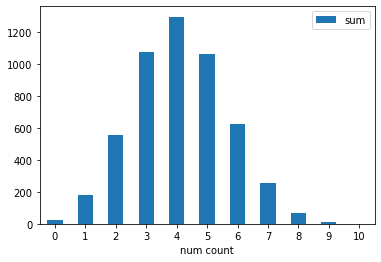

In [17]:
# creates bar chart of patients for FIRST TIME in hospital
counts0 = readmissionDF_0['sum'].value_counts() # gets counts of how many patients have how many conditions
counts0 = pd.DataFrame(counts0) # converts data back into dataframe
counts0['num count'] = [4,3,5,6,2,7,1,8,0,9,10] #order for num. better to make bell curve. 
counts0 = counts0.sort_values(by=['num count']) # sort values by count to make an easier to understand bar graph
ax = counts0.plot.bar(x='num count', y='sum', rot=0) # creates the bar chart

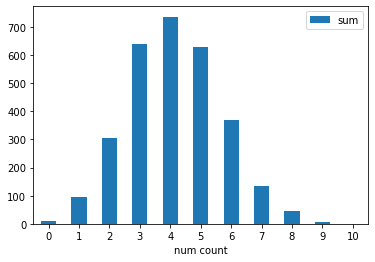

In [18]:
# creates bar chart of patients for READMISSION in hospital
counts1 = readmissionDF_1['sum'].value_counts() # gets counts of how many patients have how many conditions
counts1 = pd.DataFrame(counts1) # converts data back into dataframe
counts1['num count'] = [4,3,5,6,2,7,1,8,0,9,10] #order for num. better to make bell curve. 
counts1 = counts1.sort_values(by=['num count']) # sort values by count to make an easier to understand bar graph
ax = counts1.plot.bar(x='num count', y='sum', rot=0) # creates the bar chart

In [19]:
# PCA analysis start for patients on first visit
dataNumeric_0 = readmissionDF_0[['HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']]
pcsNames_0 = []
for i, col in enumerate(dataNumeric_0.columns):
  pcsNames_0.append('PC'+str(i+1))
print(pcsNames_0)
normal0 = (dataNumeric_0 - dataNumeric_0.mean())/(dataNumeric_0.std())
print(normal0)
pca = PCA(n_components=normal0.shape[1])
pca.fit(normal0)
data_pca = pd.DataFrame(pca.transform(dataNumeric_0),columns = pcsNames_0)
print(data_pca)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']
      HighBlood    Stroke  Overweight  Arthritis  Diabetes  Hyperlipidemia  \
0      1.200791 -0.496432   -1.561873   1.347974  1.621223       -0.709612   
4     -0.832622 -0.496432   -1.561873  -0.741710 -0.616699        1.408947   
5     -0.832622 -0.496432    0.640133   1.347974  1.621223       -0.709612   
6      1.200791 -0.496432    0.640133   1.347974  1.621223        1.408947   
7     -0.832622 -0.496432    0.640133  -0.741710 -0.616699       -0.709612   
...         ...       ...         ...        ...       ...             ...   
9981  -0.832622  2.013984    0.640133  -0.741710 -0.616699        1.408947   
9985  -0.832622  2.013984    0.640133  -0.741710 -0.616699        1.408947   
9986   1.200791 -0.496432   -1.561873  -0.741710 -0.616699        1.408947   
9993   1.200791 -0.496432    0.640133  -0.741710 -0.616699        1.408947   
9994  -0.832622 -0.496432   -1.561873   1.347974 -0.616699    

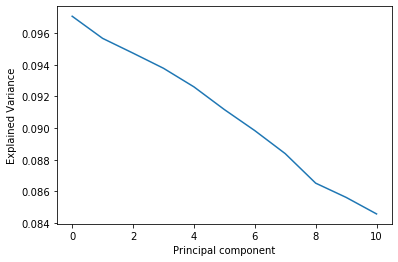

In [20]:
sns.lineplot(y = pca.explained_variance_ratio_, x=range(0,11))
plt.ylabel('Explained Variance')
plt.xlabel('Principal component')
plt.show()

In [22]:
for pc, var in zip(pcsNames_0, np.cumsum(pca.explained_variance_ratio_)):
    print(pc,var)
rotation_0 = pd.DataFrame(pca.components_.T, columns = pcsNames_0, index = dataNumeric_0.columns)
print(rotation_0)
dataReduced_0 = data_pca.iloc[:,0:11]
print(dataReduced_0)

PC1 0.09706998511449275
PC2 0.19274243800950047
PC3 0.2874806766911285
PC4 0.38126295759967577
PC5 0.47387133432324124
PC6 0.5650443257884363
PC7 0.6548873137785118
PC8 0.743275560967274
PC9 0.8297980863917527
PC10 0.9154216572356548
PC11 0.9999999999999999
                         PC1       PC2       PC3       PC4       PC5  \
HighBlood          -0.099398 -0.106521  0.674979  0.112587  0.188947   
Stroke             -0.238156  0.286473  0.075044  0.523068  0.344299   
Overweight         -0.134692  0.173090  0.433226 -0.315596  0.331322   
Arthritis          -0.331963 -0.527839  0.006855 -0.107834 -0.014810   
Diabetes            0.227078 -0.173542 -0.144470 -0.217839  0.570582   
Hyperlipidemia      0.523966  0.206694 -0.130374  0.050090 -0.033249   
BackPain            0.020150  0.577127  0.239689 -0.155880 -0.351528   
Anxiety             0.114947 -0.305407  0.237190 -0.294607 -0.412073   
Allergic_rhinitis   0.361751 -0.133705  0.432531  0.145104 -0.106606   
Reflux_esophagitis -0.

In [23]:
# PCA analysis start for patients readmission
dataNumeric_1 = readmissionDF_1[['HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']]
pcsNames_1 = []
for i, col in enumerate(dataNumeric_1.columns):
  pcsNames_1.append('PC'+str(i+1))
print(pcsNames_1)
normal1 = (dataNumeric_1 - dataNumeric_1.mean())/(dataNumeric_1.std())
print(normal1)
pca = PCA(n_components=normal1.shape[1])
pca.fit(normal1)
data_pca = pd.DataFrame(pca.transform(dataNumeric_1),columns = pcsNames_1)
print(data_pca)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']
      HighBlood    Stroke  Overweight  Arthritis  Diabetes  Hyperlipidemia  \
5000   1.182812 -0.504326   -1.546942  -0.748626 -0.611326        1.388674   
5005  -0.845158 -0.504326    0.646219  -0.748626 -0.611326        1.388674   
5008   1.182812 -0.504326   -1.546942   1.335331 -0.611326       -0.719869   
5009  -0.845158 -0.504326   -1.546942  -0.748626 -0.611326       -0.719869   
5010  -0.845158 -0.504326    0.646219   1.335331 -0.611326       -0.719869   
...         ...       ...         ...        ...       ...             ...   
9992   1.182812 -0.504326   -1.546942   1.335331  1.635239        1.388674   
9996   1.182812 -0.504326    0.646219   1.335331  1.635239       -0.719869   
9997   1.182812 -0.504326    0.646219  -0.748626 -0.611326       -0.719869   
9998  -0.845158 -0.504326    0.646219  -0.748626 -0.611326       -0.719869   
9999  -0.845158 -0.504326    0.646219   1.335331 -0.611326    

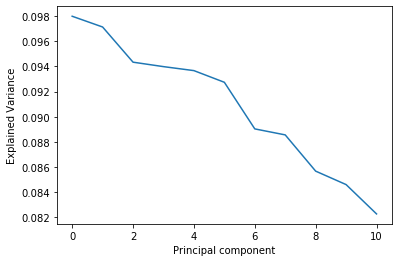

In [24]:
sns.lineplot(y = pca.explained_variance_ratio_, x=range(0,11))
plt.ylabel('Explained Variance')
plt.xlabel('Principal component')
plt.show()

In [25]:
for pc, var in zip(pcsNames_1, np.cumsum(pca.explained_variance_ratio_)):
  print(pc,var)

rotation_1 = pd.DataFrame(pca.components_.T, columns = pcsNames_1, index = dataNumeric_1.columns)
print(rotation_1)
dataReduced_1 = data_pca.iloc[:,0:11]
print(dataReduced_1)

PC1 0.097998633008865
PC2 0.19514090128863842
PC3 0.28948311426047973
PC4 0.38347117397745756
PC5 0.4771416609844364
PC6 0.5698834012351238
PC7 0.6589150354964439
PC8 0.7474688772361852
PC9 0.8331380215196443
PC10 0.9177363790545597
PC11 1.0
                         PC1       PC2       PC3       PC4       PC5  \
HighBlood          -0.450425 -0.257051 -0.309543  0.034390 -0.012320   
Stroke              0.044978  0.502939  0.438284  0.066247  0.137785   
Overweight         -0.398258 -0.366498  0.245146 -0.209038 -0.149234   
Arthritis           0.058804 -0.322634 -0.037476 -0.566969  0.380808   
Diabetes            0.332395 -0.108234  0.008130 -0.071723  0.658177   
Hyperlipidemia      0.392501 -0.279544  0.148663 -0.227060 -0.298709   
BackPain           -0.127401  0.052644 -0.532401  0.209029  0.055540   
Anxiety            -0.095368  0.465004 -0.382503 -0.310448  0.189645   
Allergic_rhinitis  -0.253859 -0.151963  0.349151  0.462776  0.347387   
Reflux_esophagitis  0.336045 -0.332400

In [26]:
readmissionDF_0.to_csv('readmissionDF_0_clean.csv') # clean dataset for first time admittence
readmissionDF_1.to_csv('readmissionDF_1_clean.csv') # clena dataset for readmittence